# Musical Note Classification

In [1]:
# Import libraries
import os, fnmatch
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Importing datasets from files to array
labels = []
files = []
#notes = ['A3','A4','A5','A6','As3','As4','As5','As6','B3','B4','B5','B6','B7','C4','C5','C6',
#        'C7','Cs4','Cs5','Cs6','Cs7','D4','D5','D6','D7','Ds4','Ds5','Ds6','Ds7','E4','E5'
#        'E6','E7','F4','F5','F6','F7','Fs4','Fs5','Fs6','Fs7','G3','G4','G5','G6','G7','Gs3',
#        'Gs4','Gs5','Gs6','Gs7']

notes = ['_A', '_As', '_B', '_C', '_Cs', '_D', '_Ds', '_E', '_F', '_Fs', '_G', '_Gs']
# Load violin data and append a new violin label & file path 
# for each '.wav' file found 
violinPath='Datasets/violin/'
for file in os.listdir(violinPath):
    if fnmatch.fnmatch(file, '*.wav'):
        files.append(violinPath+file)
        #print(file)
for file in files:
    for note in notes:
        if fnmatch.fnmatchcase(file, '*'+note+'*'):
            labels.append(note)
            break
    else:
        labels.append('other')        
#files
#labels

In [3]:
# Encode target values found in 'labels' array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
Y = le.transform(labels)

In [4]:
# Load files from 'files' array & extract MFCC data
X = []
for file in (files):
    data, sr = librosa.load(file)
    if len(data) is None:  # Catch error for incorrect file loading
        print("Error loading")
        break
    mfccs = librosa.feature.mfcc(data, n_mfcc=13, sr=sr)
    features = np.mean(mfccs,1)
    X.append(features)  # Append MFCC audio features to X data array

/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instea

In [5]:
# Split the X and Y data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
# Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
scaled_X_train  = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [7]:
# Apply the Neural Netwrok learning model and train it
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=10000)
model.fit(scaled_X_train, Y_train)

# Get model predictions
pred_Y_train = model.predict(scaled_X_train)
pred_Y_test = model.predict(scaled_X_test)

# Evaluate the model
scaledTrainScore="Scaled train score = {:0.3f}".format(model.score(scaled_X_train, Y_train))
scaledTestScore="Scaled test score = {:0.3f}".format(model.score(scaled_X_test, Y_test))

In [8]:
# Basic model accuracy
print(scaledTrainScore)
print(scaledTestScore)

Scaled train score = 1.000
Scaled test score = 0.375


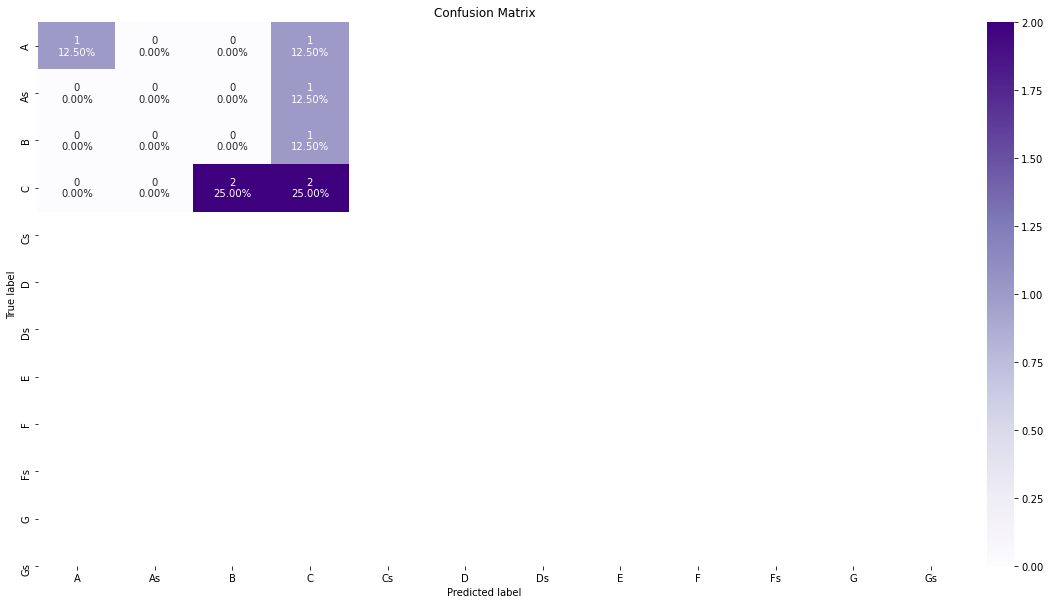

In [9]:
# Plot Confusion Matrix
from cf_matrix import make_confusion_matrix  # Import library
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, pred_Y_test)  # Creating a simple confusion matrix
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = notes # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=True,
                      cmap='Purples',
                      figsize=(20,10))
